# 0-Libraries

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape

from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D

## Librerias oversampling


In [125]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [126]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# 1- Load Data

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from tensorflow.keras import layers


In [128]:
s_aureus = pd.read_csv('s_aureus_driams_a_bin3_2000_20000Da.csv')
s_aureus = s_aureus.fillna(0)
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19991,19994,19997,code,species,Oxacillin,Clindamycin,Ceftriaxone,Ciprofloxacin,Fusidic acid
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,35.5,20.500000,27.342857,029f0abf-1664-424f-88cb-11c9c8af2b11,Staphylococcus aureus,0.0,0.0,0.0,0.0,1.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,30.0,40.500000,34.695238,08149af1-10f5-4f02-81d8-3d46d66d4a7a,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,2.5,30.500000,11.288462,08fe3876-ecee-4ddc-9aa9-a84f605757f7,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,15.5,8.000000,20.057143,0a9fdd4b-7180-47c0-849e-cb32d46da94c,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,25.5,32.000000,24.990476,0d82f4c4-473c-49d8-8c85-e3e36e96d047,Staphylococcus aureus,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,288.000000,330.285714,296.142857,265.142857,310.750000,287.000000,345.000000,260.000000,198.714286,257.285714,...,0.0,0.000000,0.004038,fe72a46e-021e-4f0c-b81e-c4c4507e5aa8_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3787,1286.142857,989.714286,938.285714,901.428571,872.000000,1001.000000,1061.571429,890.857143,813.857143,961.000000,...,0.0,0.000000,0.053908,fe73e705-161f-49a7-b021-7e78d074129b_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3788,986.857143,977.285714,892.285714,986.714286,1045.875000,986.857143,963.571429,968.571429,960.857143,969.714286,...,0.0,0.000000,0.039084,feb54c45-54f7-4758-8408-2e94ab6c53e1_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3789,141.857143,197.428571,148.142857,114.000000,125.857143,158.750000,176.571429,148.285714,149.714286,151.714286,...,0.0,0.000000,0.012113,fef2ea82-be15-4e10-8685-77c42068455c_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0


# Preprocessing Data

In [129]:
s_aureus_oxacillin = s_aureus.drop(columns=['code','species', 'Clindamycin', 'Ceftriaxone', 'Ciprofloxacin', 'Fusidic acid'])
s_aureus_oxacillin.dropna(axis=0, how="any", inplace=True)

In [130]:
s_aureus_ceftriaxone = s_aureus.drop(columns=['Oxacillin', 'Clindamycin', 'Ceftriaxone', 'Fusidic acid'])
#ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.shape

(3791, 6003)

In [131]:
s_aureus_oxacillin.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Oxacillin
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,14.333333,24.0,68.0,19.0,19.000000,50.0,35.5,20.5,27.342857,0.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,15.666667,39.0,19.5,42.0,69.666667,31.0,30.0,40.5,34.695238,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,20.666667,17.0,2.0,18.0,18.000000,11.5,2.5,30.5,11.288462,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,22.333333,33.0,29.0,14.5,21.666667,24.5,15.5,8.0,20.057143,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,26.666667,25.5,18.0,53.5,23.000000,24.5,25.5,32.0,24.990476,1.0


In [132]:
X = s_aureus_oxacillin.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus_oxacillin.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

## Enfoque en clase minoritaria

In [133]:
filtered_data = s_aureus_oxacillin[s_aureus_oxacillin['Oxacillin'] == 1].iloc[:, 0:6000].values 


In [134]:
etiquetas = s_aureus_oxacillin[s_aureus_oxacillin['Oxacillin'] == 1].iloc[:, 6000].values

In [135]:
train_set = [
    (filtered_data[i], etiquetas[i]) for i in range(len(filtered_data))
]

## Aplicacion de gan

In [136]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [137]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(6000, 2048),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output


In [138]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),  # Añadido batch normalization
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),  # Añadido batch normalization
            nn.Linear(2048, 4096),
            nn.ReLU(),
            nn.BatchNorm1d(4096),  # Añadido batch normalization
            nn.Linear(4096, 6000),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [139]:

discriminator = Discriminator()
generator = Generator()


In [140]:
num_epochs = 700
loss_function = nn.BCELoss()

In [141]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=1e-5)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=1e-4)


In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Asegurarse de que los datos reales están en float32
        real_samples = real_samples.float()

        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1)).float()  # Convertir a float32
        latent_space_samples = torch.randn((batch_size, 100)).float()  # Espacio latente en float32
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).float()  # Convertir a float32
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).float()  # Asegurarse de float32

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")


Epoch: 0 Loss D.: 0.3564521074295044
Epoch: 0 Loss G.: 0.6740890145301819
Epoch: 10 Loss D.: 0.3842724561691284
Epoch: 10 Loss G.: 0.7020592093467712
Epoch: 20 Loss D.: 0.395111083984375
Epoch: 20 Loss G.: 0.6435344219207764
Epoch: 30 Loss D.: 0.41565102338790894
Epoch: 30 Loss G.: 0.5979604721069336
Epoch: 40 Loss D.: 0.44827547669410706
Epoch: 40 Loss G.: 0.5129573345184326
Epoch: 50 Loss D.: 0.5044165849685669
Epoch: 50 Loss G.: 0.44723549485206604
Epoch: 60 Loss D.: 0.5558977723121643
Epoch: 60 Loss G.: 0.4208298921585083
Epoch: 70 Loss D.: 0.5139031410217285
Epoch: 70 Loss G.: 0.4385877549648285
Epoch: 80 Loss D.: 0.5562918782234192
Epoch: 80 Loss G.: 0.444909930229187
Epoch: 90 Loss D.: 2.842402458190918
Epoch: 90 Loss G.: 0.41064557433128357
Epoch: 100 Loss D.: 0.560870885848999
Epoch: 100 Loss G.: 0.45196533203125
Epoch: 110 Loss D.: 0.5550196170806885
Epoch: 110 Loss G.: 0.3619270324707031
Epoch: 120 Loss D.: 0.6218023896217346
Epoch: 120 Loss G.: 0.3903990089893341
Epoch: 130

## Agregar muestras sinteticas a modelo

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [144]:

# Asegúrate de que el generador esté en modo de evaluación
generator.eval()

# Definir el tamaño del batch que deseas generar
batch_size = pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]  # Puedes generar tantas muestras como desees

# Generar un tensor de tamaño (batch_size, 100) con valores aleatorios (espacio latente)
latent_space_samples = torch.randn(batch_size, 100).float()

# Generar las muestras sintéticas utilizando el generador
synthetic_samples = generator(latent_space_samples)

# Convertir el tensor de PyTorch a un arreglo de NumPy
synthetic_samples_numpy = synthetic_samples.detach().cpu().numpy()


# Cambiar el tipo de datos a float32
synthetic_samples_numpy = synthetic_samples_numpy.astype(np.float32)

# Mostrar las muestras generadas
print(synthetic_samples)

tensor([[  8.4944,  25.7226,  31.2629,  ...,  43.1685,   9.7193,  -5.2175],
        [177.1736, 128.9285, 117.3601,  ...,  28.2764,   6.5341,   4.7095],
        [190.0049, 133.8711, 115.0629,  ...,  14.5036,  14.0609,   7.5397],
        ...,
        [-21.3547,  14.3119,  27.9883,  ...,  32.7118,   2.8935,  -8.2676],
        [211.5135, 151.0600, 142.5094,  ...,  14.6193,  13.0850,   7.0502],
        [109.5043, 120.2789, 147.0728,  ...,  38.8745,   5.8940,  -5.8536]],
       grad_fn=<AddmmBackward0>)


In [145]:
synthetic_samples_numpy.shape

(1870, 6000)

In [146]:
X_train_balanced = np.concatenate((X_train,synthetic_samples_numpy))

In [147]:
array_ones = np.ones(pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])
array_ones = np.asarray(array_ones).astype(np.float32)


In [148]:
y_train_balanced = np.concatenate((y_train, array_ones))


In [149]:
pd.Series(y_train).value_counts()

0.0    2451
1.0     581
Name: count, dtype: int64

In [150]:
s_aureus_oxacillin.shape

(3791, 6001)

## Visualizacion de datos sinteticos

In [151]:
# Asegúrate de que el generador esté en modo de evaluación
generator.eval()

# Definir el tamaño del batch que deseas generar
batch_size = 10000  # Puedes generar tantas muestras como desees

# Generar un tensor de tamaño (batch_size, 100) con valores aleatorios (espacio latente)
espacioLatente = torch.randn(batch_size, 100).float()

# Generar las muestras sintéticas utilizando el generador
muestrasSinteticasParaVisualizacion = generator(espacioLatente)

# Convertir el tensor de PyTorch a un arreglo de NumPy
muestrasSinteticasParaVisualizacion_numpy = muestrasSinteticasParaVisualizacion.detach().cpu().numpy()


# Cambiar el tipo de datos a float32
muestrasSinteticasParaVisualizacion_numpy = muestrasSinteticasParaVisualizacion_numpy.astype(np.float32)


"""
# Asegúrate de que el generador esté en modo de evaluación
generator.eval()

# Definir el tamaño del batch que deseas generar
batch_size = pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]  # Puedes generar tantas muestras como desees

# Generar un tensor de tamaño (batch_size, 100) con valores aleatorios (espacio latente)
latent_space_samples = torch.randn(batch_size, 100).float()

# Generar las muestras sintéticas utilizando el generador
synthetic_samples = generator(latent_space_samples)

# Convertir el tensor de PyTorch a un arreglo de NumPy
synthetic_samples_numpy = synthetic_samples.detach().cpu().numpy()


# Cambiar el tipo de datos a float32
synthetic_samples_numpy = synthetic_samples_numpy.astype(np.float32)

# Mostrar las muestras generadas
print(synthetic_samples)"""


'\n# Asegúrate de que el generador esté en modo de evaluación\ngenerator.eval()\n\n# Definir el tamaño del batch que deseas generar\nbatch_size = pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]  # Puedes generar tantas muestras como desees\n\n# Generar un tensor de tamaño (batch_size, 100) con valores aleatorios (espacio latente)\nlatent_space_samples = torch.randn(batch_size, 100).float()\n\n# Generar las muestras sintéticas utilizando el generador\nsynthetic_samples = generator(latent_space_samples)\n\n# Convertir el tensor de PyTorch a un arreglo de NumPy\nsynthetic_samples_numpy = synthetic_samples.detach().cpu().numpy()\n\n\n# Cambiar el tipo de datos a float32\nsynthetic_samples_numpy = synthetic_samples_numpy.astype(np.float32)\n\n# Mostrar las muestras generadas\nprint(synthetic_samples)'

In [152]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_sintetico_pca_2d = pca.fit_transform(muestrasSinteticasParaVisualizacion_numpy)

In [153]:
X_sintetico_pca_2d

array([[-2248.4856, -1196.8268],
       [-3533.1067, -1843.367 ],
       [ 2738.2466,  -357.5017],
       ...,
       [-4926.817 ,  -713.1124],
       [-3549.302 , -1851.2644],
       [-3485.6538,  -503.4953]], dtype=float32)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_visualizacion = scaler.fit_transform(X_sintetico_pca_2d)


In [155]:
X_visualizacion

array([[-0.98781234, -0.7127262 ],
       [-1.5521765 , -1.0977492 ],
       [ 1.202976  , -0.21289727],
       ...,
       [-2.1644661 , -0.42466804],
       [-1.5592915 , -1.1024523 ],
       [-1.5313294 , -0.29983833]], dtype=float32)

In [156]:
X_tensor = torch.tensor(X_visualizacion, dtype=torch.float32)


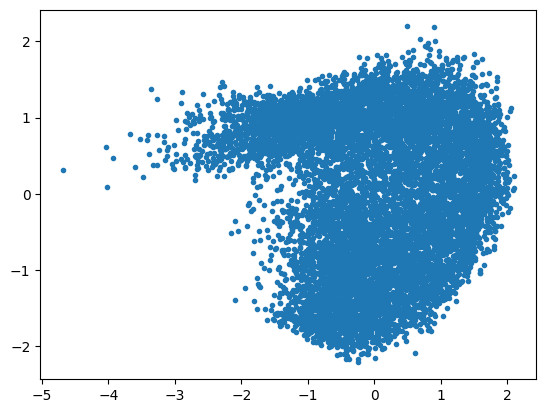

In [157]:
generated_samples = X_tensor.detach()
plt.plot( X_tensor[:, 1],X_tensor[:, 0], ".")

## continuacion de modelo

In [158]:
print(pd.Series(y_train).value_counts())

0.0    2451
1.0     581
Name: count, dtype: int64


In [159]:
print(pd.Series(y_train).value_counts()[1])

581


In [160]:
len(X_train)

3032

In [161]:
print(pd.Series(y_train_balanced).value_counts())


1.0    2451
0.0    2451
Name: count, dtype: int64


In [162]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_train_balanced)
X_test = sc_X.transform(X_test)

In [163]:
X_train_balanced.shape[0]

4902

In [164]:
sample_size = X_train_balanced.shape[0] # numero de muestras en el set de datos
time_steps  = X_train_balanced.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_train_balanced.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [165]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

# Create and fit DeepAMR model

In [166]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

Model: "Modelo_s_aureus_ciprofloxacin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv1D)             (None, 5984, 64)          1152      
                                                                 
 batch_normalization (BatchN  (None, 5984, 64)         256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 5984, 64)          0         
                                                                 
 MaxPooling1D_1 (MaxPooling1  (None, 2992, 64)         0         
 D)                                                              
                                                                 
 Conv_2 (Conv1D)             (None, 2984, 128)         73856     
                                                                 
 batch_normalization_1 (Batc  (None, 

In [167]:
y_train_balanced.shape

(4902,)

In [170]:
history = model.fit(X_train_reshaped, y_train_balanced, epochs=100, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

Epoch 1/100
442/442 [==============================] - 10s 22ms/step - loss: 5.0005 - tp: 1437.0000 - fp: 102.0000 - tn: 2349.0000 - fn: 523.0000 - accuracy: 0.8583 - precision: 0.9337 - recall: 0.7332 - auc: 0.8982 - prc: 0.9143 - val_loss: 4.3439 - val_tp: 491.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00 - val_prc: 1.0000 - lr: 1.0000e-04
Epoch 2/100
442/442 [==============================] - 10s 22ms/step - loss: 4.3896 - tp: 1486.0000 - fp: 102.0000 - tn: 2349.0000 - fn: 474.0000 - accuracy: 0.8694 - precision: 0.9358 - recall: 0.7582 - auc: 0.9168 - prc: 0.9276 - val_loss: 3.8263 - val_tp: 491.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00 - val_prc: 1.0000 - lr: 1.0000e-04
Epoch 3/100
442/442 [==============================] - 9s 21ms/step - loss: 3.8984 - tp:

# Evaluate the model

In [171]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

24/24 [==============================] - 1s 13ms/step
[[  5 609]
 [  0 145]]


In [172]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.504071661237785


In [173]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       614
           1       0.19      1.00      0.32       145

    accuracy                           0.20       759
   macro avg       0.60      0.50      0.17       759
weighted avg       0.85      0.20      0.07       759

76/76 [==============================] - 0s 6ms/step
loss :  0.8310088515281677
tp :  145.0
fp :  609.0
tn :  5.0
fn :  0.0
accuracy :  0.197628453373909
precision :  0.19230769574642181
recall :  1.0
auc :  0.6176232695579529
prc :  0.31312960386276245



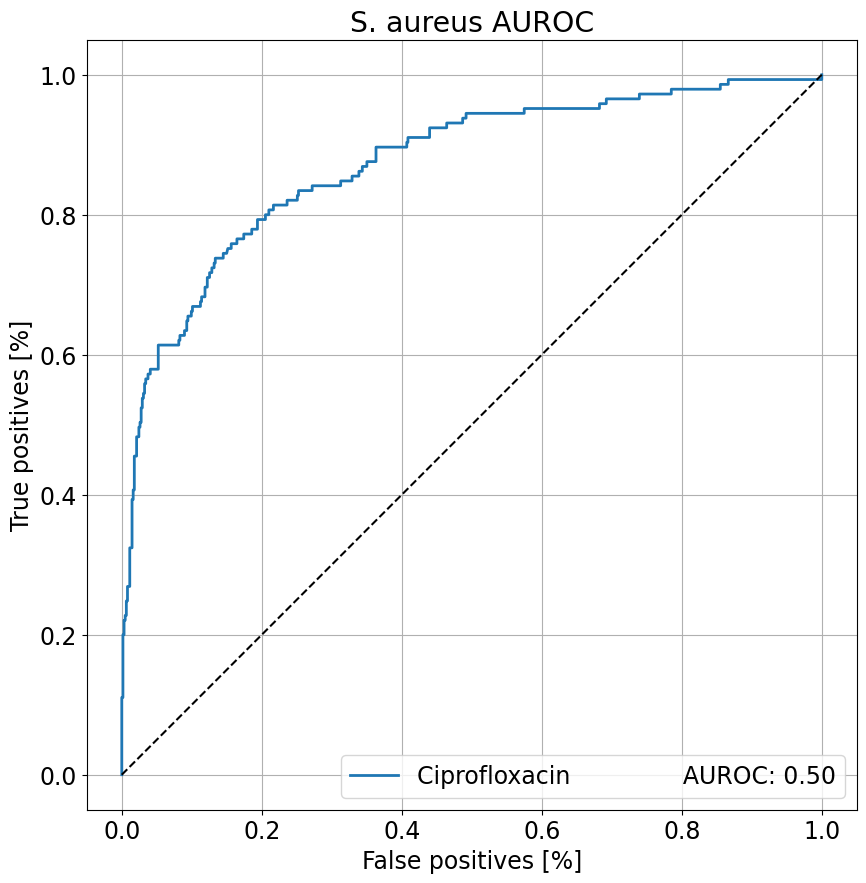

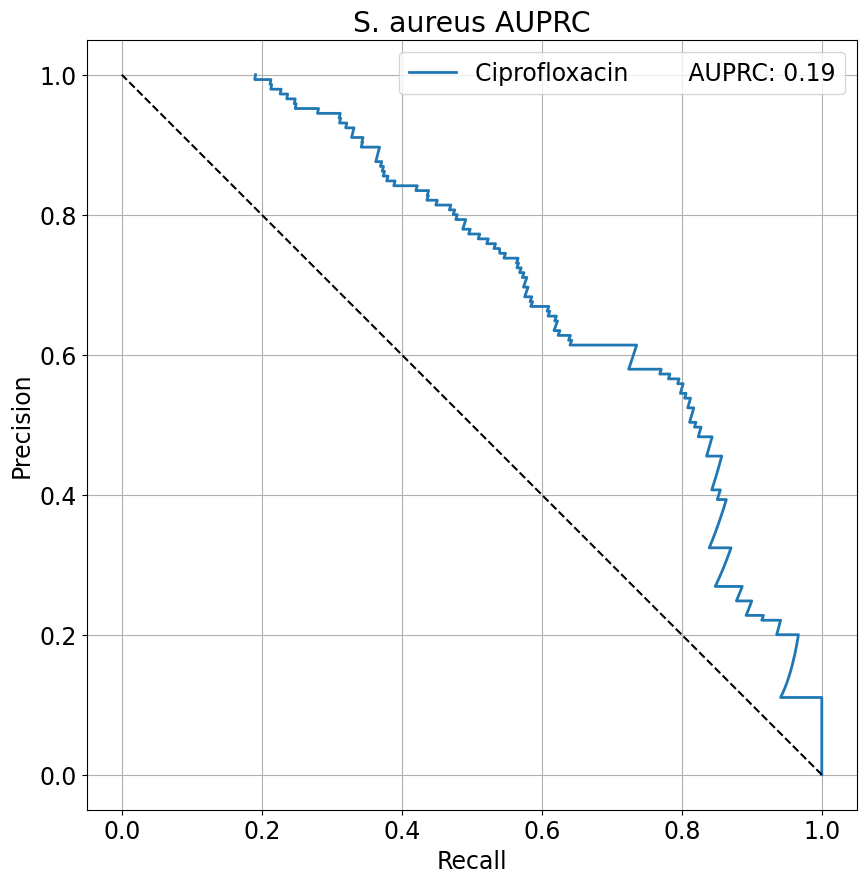

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()